In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import optuna
# import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
#plt.style.use('fivethirtyeight')
import xgboost as xgb
import sklearn
import random
from NecessaryModules.getData import getData
from NecessaryModules.splitData import split_data

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_absolute_error

In [3]:
filename = 'Dataset/ionosphere.csv'
dataset,label=getData(filename)
# dataset=pd.DataFrame(dataset) #from dataset_list to dataset_dataframe after suffling
print(dataset)
print(label)

[[1.0, 0.0, 0.99539, -0.05889, 0.85243, 0.02306, 0.83398, -0.37708, 1.0, 0.0376, 0.85243, -0.17755, 0.59755, -0.44945, 0.60536, -0.38223, 0.84356, -0.38542, 0.58212, -0.32192, 0.56971, -0.29674, 0.36946, -0.47357, 0.56811, -0.51171, 0.41078, -0.46168, 0.21266, -0.3409, 0.42267, -0.54487, 0.18641, -0.453], [1.0, 0.0, 1.0, -0.18829, 0.93035, -0.36156, -0.10868, -0.93597, 1.0, -0.04549, 0.50874, -0.67743, 0.34432, -0.69707, -0.51685, -0.97515, 0.05499, -0.62237, 0.33109, -1.0, -0.13151, -0.453, -0.18056, -0.35734, -0.20332, -0.26569, -0.20468, -0.18401, -0.1904, -0.11593, -0.16626, -0.06288, -0.13738, -0.02447], [1.0, 0.0, 1.0, -0.03365, 1.0, 0.00485, 1.0, -0.12062, 0.88965, 0.01198, 0.73082, 0.05346, 0.85443, 0.00827, 0.54591, 0.00299, 0.83775, -0.13644, 0.75535, -0.0854, 0.70887, -0.27502, 0.43385, -0.12062, 0.57528, -0.4022, 0.58984, -0.22145, 0.431, -0.17365, 0.60436, -0.2418, 0.56045, -0.38238], [1.0, 0.0, 1.0, -0.45161, 1.0, 1.0, 0.71216, -1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0, 0.

In [4]:
pcaTrain = PCA(n_components=10).fit(dataset)# --train-- pca with the "dataset" Dataframe
print(pcaTrain)
compressed_dataset_X= pcaTrain.transform(dataset) # --transform-- the original "dataset" Dataframe into a lower-dimensional space based on the model's learned parameters
print(type(compressed_dataset_X))
print(len(compressed_dataset_X[0]))
print(compressed_dataset_X)

PCA(n_components=10)
<class 'numpy.ndarray'>
10
[[-0.85933286 -0.96140676 -0.58608236 ...  0.09554082  0.51293798
  -0.3775823 ]
 [ 0.76552441 -1.06271411 -1.39733865 ... -0.02855082  0.60080835
  -1.40271301]
 [-1.11681736 -0.39225594  0.00798828 ...  0.10397758  0.24514388
  -0.23544043]
 ...
 [-2.00968648  0.00702143  0.3456035  ...  0.01473899 -0.17882188
   0.07659244]
 [-1.87850608 -0.25826339  0.27997341 ...  0.00646042 -0.1425708
   0.06213613]
 [-1.54878315 -0.18752643  0.21757082 ...  0.13271807 -0.05099538
   0.06285422]]


In [5]:
# from NecessaryModules.splitData import split_data
X_train, y_train, X_test, y_test = split_data(dataset,label)
print(len(X_train[0]))

34


In [6]:
compressed_dataset_X_train= pcaTrain.transform(X_train) # --transform-- the original "dataset" Dataframe into a lower-dimensional space based on the model's learned parameters
print(type(compressed_dataset_X_train))
print(len(compressed_dataset_X_train))
print(compressed_dataset_X_train)

compressed_dataset_X_test= pcaTrain.transform(X_test) # --transform-- the original "dataset" Dataframe into a lower-dimensional space based on the model's learned parameters
print(type(compressed_dataset_X_test))
print(len(compressed_dataset_X_test))
print(compressed_dataset_X_test)

<class 'numpy.ndarray'>
240
[[ 1.51619247  0.39134785  0.18706507 ...  0.15424382  0.76410168
  -0.38556449]
 [ 2.81683384  2.02801675 -0.05367124 ...  0.06618722  0.28242854
  -0.04620941]
 [-1.82851457  0.15505857  0.37211835 ...  0.0977214  -0.11124137
   0.07729293]
 ...
 [-1.86693809  0.12540337  0.25690624 ...  0.12603774 -0.23988934
   0.10534998]
 [ 0.72350219  0.74560962 -2.43200645 ... -0.66120318  0.44806302
   0.31423959]
 [-1.05026503 -1.62674116 -0.79524145 ... -0.0223427   0.36719791
  -0.24786628]]
<class 'numpy.ndarray'>
111
[[-0.24011977 -0.19244334  0.16197706 ...  0.30329853  0.19814159
   0.29832631]
 [-0.06357184 -0.14104898 -0.52196728 ...  0.26578237  0.11241554
   0.2864618 ]
 [ 1.3301117  -0.17276666 -1.14447939 ...  0.56427487  0.1848473
  -0.22143456]
 ...
 [-1.37632362  0.69291007  0.4803298  ... -0.18746907  0.29126452
   0.30859529]
 [ 3.0726872  -0.96966149  1.54401648 ... -0.40428794 -0.34490283
   0.45482417]
 [-2.0390088  -0.29822816  0.25332058 ...  

# tune Random-Forest model

In [7]:
# train the model with random parameter
from sklearn.ensemble import RandomForestClassifier
# Preparing the regressor and fitting data with some parameters
model = RandomForestClassifier(

    criterion="entropy",
    min_samples_split=2,
    min_samples_leaf=1,
    max_depth=25,
    n_estimators=348,
) 

model.fit(compressed_dataset_X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=25, n_estimators=348)

In [8]:
# Finding mean absolute error
preds = model.predict(compressed_dataset_X_test)
preds = preds.astype(int)
mae = np.abs(y_test-preds).mean()
mae

0.02702702702702703

In [9]:
# Defining the best parameter with optuna
from sklearn.model_selection import KFold
K = 5 # 5 fold cross validation
kf = KFold(n_splits = K, random_state = 42, shuffle = True)


train_tunned = np.array(compressed_dataset_X)
target_train_tunned = np.array(label)

# test = np.array(X)
# target_train = df_train['congestion'].values

# test_preds = np.zeros((len(test)))
oof_preds = np.zeros((len(train_tunned)))
abs_error_arr=[]
def objective(trial):

 for train_index, val_index in (kf.split(compressed_dataset_X)):
    train_X, valid_X = train_tunned[train_index], train_tunned[val_index]
    train_Y, valid_Y = target_train_tunned[train_index], target_train_tunned[val_index]
    
        
        # train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.25,random_state=0)
    param = {
            'n_estimators':trial.suggest_int('n_estimators',50,500),
            'criterion':trial.suggest_categorical('criterion',['gini', 'entropy', 'log_loss']),
            'max_depth':trial.suggest_int('max_depth',20,50),
            'min_samples_split':2,
            'min_samples_leaf':1,
            'max_features':trial.suggest_categorical('max_features',['sqrt', 'log2', None]),
            'random_state':trial.suggest_int('random_state',0,10),
       
      
        }
    model = RandomForestClassifier(**param)  
        
    model.fit(train_X,train_Y)
        
    preds = model.predict(valid_X)
    oof_preds[val_index] = preds # preds gives total 3846 predicted value for valid_X


 
 print(len(oof_preds))
      
 mae = mean_absolute_error(target_train_tunned, oof_preds)
        
 return mae

In [10]:
# this is the main optuna for optimizing a object-->"objective"
study = optuna.create_study(direction='minimize',study_name="XG_tune")

[I 2024-03-01 19:58:51,893] A new study created in memory with name: XG_tune


In [11]:

study.optimize(objective, n_trials=5) # 150 bar "objective" object ke trial kore kore dekhbe, here total 5*100=750
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

[I 2024-03-01 19:58:55,573] Trial 0 finished with value: 0.06267806267806268 and parameters: {'n_estimators': 397, 'criterion': 'entropy', 'max_depth': 39, 'max_features': 'log2', 'random_state': 4}. Best is trial 0 with value: 0.06267806267806268.


351


[I 2024-03-01 19:59:01,009] Trial 1 finished with value: 0.05982905982905983 and parameters: {'n_estimators': 410, 'criterion': 'entropy', 'max_depth': 31, 'max_features': None, 'random_state': 0}. Best is trial 1 with value: 0.05982905982905983.


351


[I 2024-03-01 19:59:04,782] Trial 2 finished with value: 0.05413105413105413 and parameters: {'n_estimators': 479, 'criterion': 'log_loss', 'max_depth': 37, 'max_features': 'sqrt', 'random_state': 7}. Best is trial 2 with value: 0.05413105413105413.


351


[I 2024-03-01 19:59:06,246] Trial 3 finished with value: 0.05698005698005698 and parameters: {'n_estimators': 181, 'criterion': 'entropy', 'max_depth': 29, 'max_features': 'log2', 'random_state': 0}. Best is trial 2 with value: 0.05413105413105413.


351


[I 2024-03-01 19:59:09,152] Trial 4 finished with value: 0.05128205128205128 and parameters: {'n_estimators': 423, 'criterion': 'gini', 'max_depth': 49, 'max_features': 'sqrt', 'random_state': 1}. Best is trial 4 with value: 0.05128205128205128.


351
Number of finished trials: 5
Best trial: {'n_estimators': 423, 'criterion': 'gini', 'max_depth': 49, 'max_features': 'sqrt', 'random_state': 1}


In [12]:
#evaluate the trial
print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial
print("  Value: ", trial.value)
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Number of finished trials:  5
Best trial:
  Value:  0.05128205128205128
  Params: 
    n_estimators: 423
    criterion: gini
    max_depth: 49
    max_features: sqrt
    random_state: 1


# fit the Random-Forest

In [13]:

K2 = 10 # 5 fold cross validation
kf2 = KFold(n_splits = K2, random_state = 42, shuffle = True)

In [14]:
# Let us make predictions for each of the 5 models and find mean 
# of those predictions

from tqdm import tqdm
train = np.array(compressed_dataset_X_train)
target_train = np.array(y_train)

test = np.array(compressed_dataset_X_test)
target_test = np.array(y_test)

# error_going_up=0

test_preds = np.zeros((len(test)))
oof_preds = np.zeros((len(train)))

for train_index, val_index in tqdm(kf.split(compressed_dataset_X_train), total=5):
    train_X, valid_X = train[train_index], train[val_index]
    train_y, valid_y = target_train[train_index], target_train[val_index]
    rf_params = study.best_trial.params
    model = RandomForestClassifier(**rf_params,warm_start=True)
    model.fit(train_X, train_y)
    # for train accuracy
    preds = model.predict(valid_X)
    oof_preds[val_index] = preds
    # for test accuracy
    preds_test = model.predict(test)
    test_preds += (preds_test)/5

    # #early_stopping
    # preds_train = model.predict(train_X)
    # error_going_up=EarlyStopping(valid_y,preds,train_y,preds_train,error_going_up=0)
    # if error_going_up==EARLY_STOP_NUM:
    #     print('early stopping occurs!!')
    #     break

print(np.abs(oof_preds-target_train).mean())

100%|██████████| 5/5 [00:02<00:00,  1.76it/s]

0.07916666666666666


In [15]:
from sklearn.metrics import accuracy_score
# valid_Acc_SVC=accuracy_score(target_train,oof_preds)
# print(valid_Acc_SVC)

# another technique for calculate test accuracy
test_Acc_SVC=accuracy_score(target_test,test_preds.round())
print(test_Acc_SVC)

0.972972972972973


In [16]:
#validation accuracy
valid_Acc=accuracy_score(target_train,oof_preds)
print(valid_Acc)

0.9208333333333333


In [17]:
# train accuracy
train_Acc=model.score(compressed_dataset_X_train,y_train)
print(train_Acc)

0.9916666666666667


In [18]:
# test_accuracy
test_Acc=model.score(compressed_dataset_X_test,y_test)
print(test_Acc)

0.972972972972973


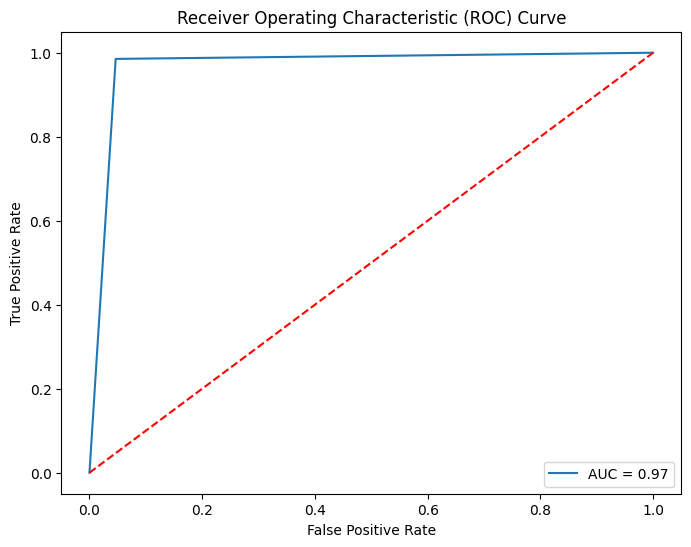

In [19]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming y_true contains true labels and y_scores contains predicted scores/probabilities
fpr, tpr, thresholds = roc_curve(target_test,test_preds.round())

# Calculate the Area Under the ROC Curve (AUC)
auc = roc_auc_score(target_test,test_preds.round())

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'r--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
# plt.grid(True)
plt.show()


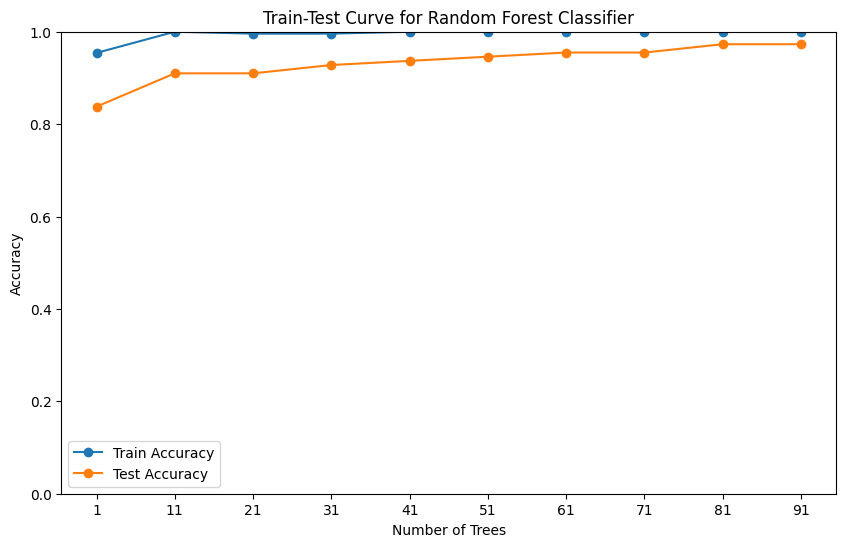

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Assuming X_train, X_test, y_train, y_test are your training and test data

# Define a range of hyperparameter values to test
param_range = np.arange(1, 101, 10)  # Example range for number of trees

# Initialize empty lists to store train and test scores
train_scores = []
test_scores = []

# Iterate over the hyperparameter values
for param in param_range:
    # Initialize Random Forest classifier with current hyperparameter value
    rf_classifier = RandomForestClassifier(n_estimators=param, random_state=42)
    
    # Train the classifier
    rf_classifier.fit(compressed_dataset_X_train, y_train)
    
    # Make predictions on the training and test sets
    y_train_pred = rf_classifier.predict(compressed_dataset_X_train)
    y_test_pred = rf_classifier.predict(compressed_dataset_X_test)
    
    # Calculate accuracy scores for training and test sets
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Append scores to the lists
    train_scores.append(train_accuracy)
    test_scores.append(test_accuracy)

# Plot the train-test curve
plt.figure(figsize=(10, 6))
plt.plot(param_range, train_scores, label='Train Accuracy', marker='o')
plt.plot(param_range, test_scores, label='Test Accuracy', marker='o')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.title('Train-Test Curve for Random Forest Classifier')
plt.xticks(param_range)
plt.legend()
# plt.grid(True)
plt.show()


# CM

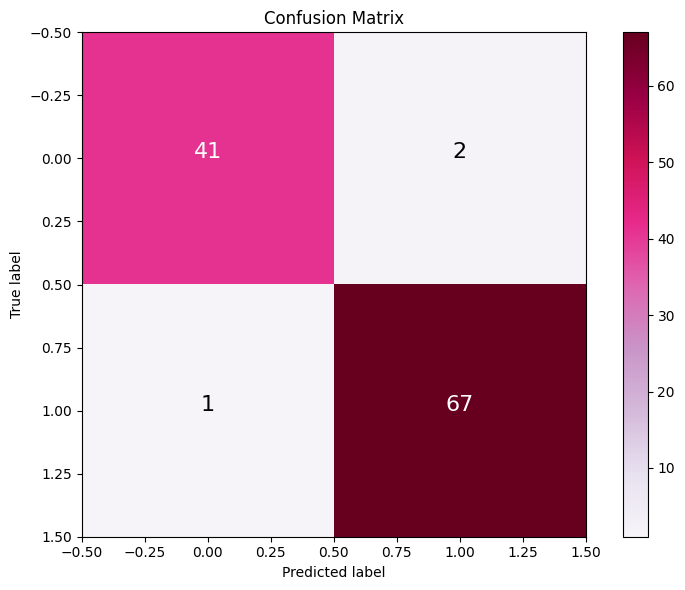

In [21]:
############# plot confusion matrix ############

from matplotlib import pyplot as plt
from sklearn import metrics

cm = metrics.confusion_matrix(target_test, test_preds.round())
# Plot confusion matrix with custom color map

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.PuRd)  # Set cmap to custom color map
plt.title('Confusion Matrix')
plt.colorbar()

# Adding annotations
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), #'d = integer
                 horizontalalignment="center",fontsize=16,
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout() #improves the layout of plots by preventing overlapping elements such as axis labels, tick labels, and titles
plt.show()


# others

In [22]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have defined y_true (true labels) and y_pred (predicted labels) elsewhere in your code

# Calculate precision, recall, and F1 score
precision = precision_score(target_test, test_preds.round(), average='weighted')  # Calculate precision
recall = recall_score(target_test, test_preds.round(), average='weighted')  # Calculate recall
f1 = f1_score(target_test, test_preds.round(), average='weighted')  # Calculate F1 score

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Precision: 0.9730196034543861
Recall: 0.972972972972973
F1 Score: 0.9729126292458194


In [23]:
import numpy as np

# Assuming cm is the confusion matrix
# Assuming you have defined target_test and test_preds elsewhere in your code

# Calculate precision, recall, and F1 score from the confusion matrix
def calculate_metrics(cm):
    # Precision = TP / (TP + FP)
    precision = np.diag(cm) / np.sum(cm, axis=0)

    # Recall = TP / (TP + FN)
    recall = np.diag(cm) / np.sum(cm, axis=1)

    # F1 Score = 2 * (Precision * Recall) / (Precision + Recall)
    f1 = 2 * (precision * recall) / (precision + recall)

    # Handle possible NaN values due to division by zero
    precision = np.nan_to_num(precision)
    recall = np.nan_to_num(recall)
    f1 = np.nan_to_num(f1)

    return precision, recall, f1

precision, recall, f1 = calculate_metrics(cm)

print("Precision:", sum(precision)/len(precision))
print("Recall:", sum(recall)/len(recall))
print("F1 Score:", sum(f1)/len(f1))

Precision: 0.9736024844720497
Recall: 0.969391244870041
F1 Score: 0.9714040360669816
